# 인도네시아어

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

## 데이터 라벨링

In [2]:
df_id_s = pd.read_csv('./data/[인도네시아어]라벨링_스케일링_이진.csv', encoding='utf-8')

In [3]:
from sklearn.model_selection import train_test_split
header = []
for i in df_id_s:
    header.append(i)

    x = df_id_s[header[3:-1]]
    y = df_id_s[header[-1]]  #데이터셋 분류: x=input variable, y=output variable

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=42)  #데이터셋 학습용/테스트용 나눔

## 예측 데이터

In [4]:
df_en_s = pd.read_csv('./test/영어_공통웹툰_id타겟.csv', encoding='utf-8')
X0_test = df_en_s[df_en_s.columns[1:-1]]
y0_test = df_en_s[df_en_s.columns[-1]]

df_sp_s = pd.read_csv('./test/스페인어_공통웹툰_id타겟.csv')
X1_test = df_sp_s[df_sp_s.columns[1:-1]]
y1_test = df_sp_s[df_sp_s.columns[-1]]

# 이진분류
## 1. 로지스틱회귀 이진분류

In [5]:
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
model = LogisticRegression()

#분류 모델 학습
model.fit(X_train, y_train)

#분류 결과
print('[분류 결과] \n', model.predict(X_test))
print('\n 테스트 정확도 :', model.score(X_test, y_test))
logist = model.score(X_test, y_test)

print('\n영어-> 인도네시아어 테스트 정확도 :', model.score(X0_test, y0_test))
logist_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 인도네시아어 테스트 정확도 :', model.score(X1_test, y1_test))
logist_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0]

 테스트 정확도 : 0.8

영어-> 인도네시아어 테스트 정확도 : 0.5714285714285714

스페인어-> 인도네시아어 테스트 정확도 : 0.7777777777777778


,Coef
Comments Likes,2.344224
Action,1.648947
Amount,1.205419
Grade,0.705638
Subscribers,0.676662
Total Likes,0.631037
romantic-fantasy,0.626231
Romance,0.402586
SJ,0.378806
Slice of life,0.096943


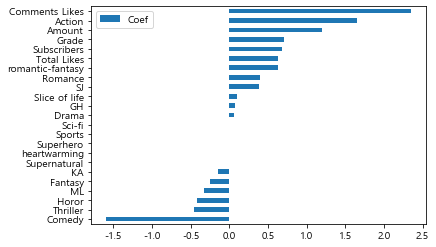

In [6]:
df_LG = pd.DataFrame(model.coef_[0], columns=['Coef'], index= X_test.columns ).sort_values(by='Coef')
df_LG.plot(kind = 'barh')
df_LG.sort_values(by='Coef', ascending = False)

### 로지스틱회귀  Confusion Matrix & Performances

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def confusion_matrix_lan(X_test, y_test, lan1, lan2):
    y_true = list(y_test)
    y_pred = model.predict(X_test)
    confusion_matrix(y_true, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                         index=['상위50%', '하위50%'],
                         columns=['상위50%', '하위50%'])

    plt.figure(figsize=(5.5, 4))
    sns.heatmap(cm_df, annot=True)
    plt.title(lan1 + '-> ' + lan2 +
              ' \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(
        'Accuracy : {:.3f} \nPrecision : {:.3f} \nRecall : {:.3f} \nF1_score: {:.3f} '
        .format(accuracy_score(y_test, y_pred),
                precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                f1_score(y_test, y_pred)))

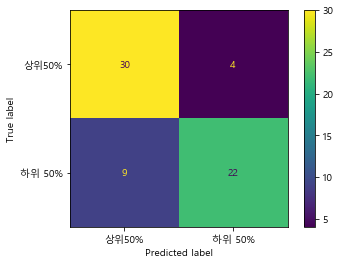

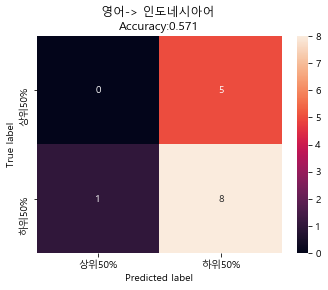

Accuracy : 0.571 
Precision : 0.615 
Recall : 0.889 
F1_score: 0.727 


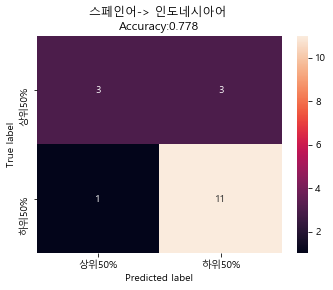

Accuracy : 0.778 
Precision : 0.786 
Recall : 0.917 
F1_score: 0.846 


In [8]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      display_labels=['상위50%', '하위 50%'])
confusion_matrix_lan(X0_test, y0_test, '영어', '인도네시아어')
confusion_matrix_lan(X1_test, y1_test, '스페인어', '인도네시아어')

## KNN 

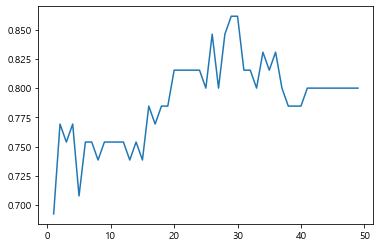

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(X_train, y_train)
#print('[분류 결과] \n', model.predict(X_test))
k = 50
scores = []
for i in range(1, k):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #print('\n [테스트 정확도] :', score)
    scores.append(score)
# print(model.predict_proba(X_test))
K = scores.index(max(scores)) + 1
plt.plot([i for i in range(1, k)], scores)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test))
print('\n [테스트 정확도] :', model.score(X_test, y_test))
# model.predict(xx_test)
knn = model.score(X_test, y_test)

print('\n영어-> 인도네시아어 테스트 정확도 :', model.score(X0_test, y0_test))
knn_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 인도네시아어 테스트 정확도 :', model.score(X1_test, y1_test))
knn_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0]

 [테스트 정확도] : 0.8615384615384616

영어-> 인도네시아어 테스트 정확도 : 0.5714285714285714

스페인어-> 인도네시아어 테스트 정확도 : 0.6111111111111112


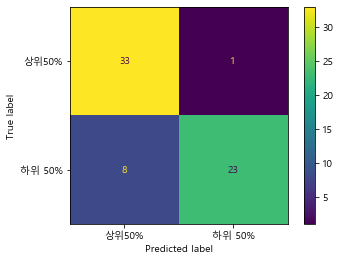

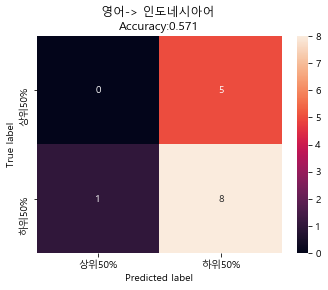

Accuracy : 0.571 
Precision : 0.615 
Recall : 0.889 
F1_score: 0.727 


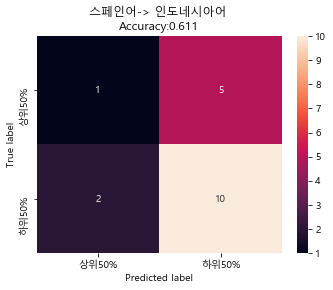

Accuracy : 0.611 
Precision : 0.667 
Recall : 0.833 
F1_score: 0.741 


In [11]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      display_labels=['상위50%', '하위 50%'])
confusion_matrix_lan(X0_test, y0_test, '영어', '인도네시아어')
confusion_matrix_lan(X1_test, y1_test, '스페인어', '인도네시아어')

## RandomForest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

#print(model.predict_proba(X_test))
print('[분류 결과] \n', model.predict(X_test))
print('\n [테스트 정확도] :', model.score(X_test, y_test))

RF = model.score(X_test, y_test)
# print('스페인어 분류 예측:', model.predict(xx_test))

print('\n영어-> 인도네시아어 테스트 정확도 :', model.score(X0_test, y0_test))
RF_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 인도네시아어 테스트 정확도 :', model.score(X1_test, y1_test))
RF_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0]

 [테스트 정확도] : 0.8153846153846154

영어-> 인도네시아어 테스트 정확도 : 0.5714285714285714

스페인어-> 인도네시아어 테스트 정확도 : 0.5


,Importance
Comments Likes,0.332567
Amount,0.133265
Subscribers,0.111617
Total Likes,0.107187
Grade,0.106841
Comedy,0.052050
ML,0.042576
Action,0.028533
romantic-fantasy,0.024247
Horor,0.010439


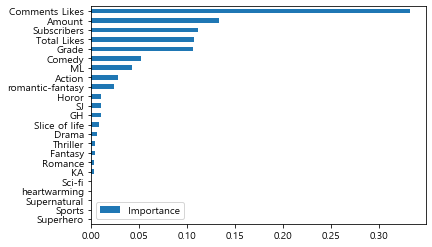

In [13]:
df_RF = pd.DataFrame(model.feature_importances_,
             columns=['Importance'], index = X_test.columns).sort_values(by='Importance')
df_RF.plot(kind='barh' ,sort_columns ='Importance' )
df_RF.sort_values(by='Importance', ascending = False)

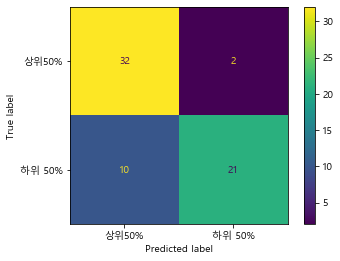

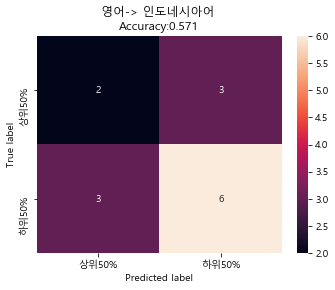

Accuracy : 0.571 
Precision : 0.667 
Recall : 0.667 
F1_score: 0.667 


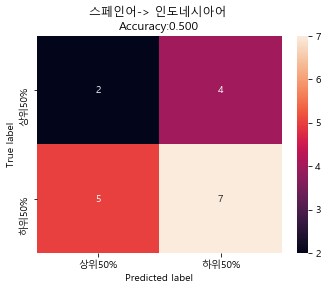

Accuracy : 0.500 
Precision : 0.636 
Recall : 0.583 
F1_score: 0.609 


In [14]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      display_labels=['상위50%', '하위 50%'])
confusion_matrix_lan(X0_test, y0_test, '영어', '인도네시아어')
confusion_matrix_lan(X1_test, y1_test, '스페인어', '인도네시아어')

## SVM - SVC

In [15]:
from sklearn.svm import SVC  #Ridge
model = SVC(random_state=42)

#분류 모델 학습
model.fit(X_train, y_train)

#분류 결과
print('[분류 결과] \n', model.predict(X_test))
print('\n 테스트 정확도 :', model.score(X_test, y_test))
SVM = model.score(X_test, y_test)

print('\n영어-> 인도네시아어 테스트 정확도 :', model.score(X0_test, y0_test))
SVM_pred0 = model.score(X0_test, y0_test)

print('\n스페인어-> 인도네시아어 테스트 정확도 :', model.score(X1_test, y1_test))
SVM_pred1 = model.score(X1_test, y1_test)

[분류 결과] 
 [1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0]

 테스트 정확도 : 0.8461538461538461

영어-> 인도네시아어 테스트 정확도 : 0.5714285714285714

스페인어-> 인도네시아어 테스트 정확도 : 0.6666666666666666


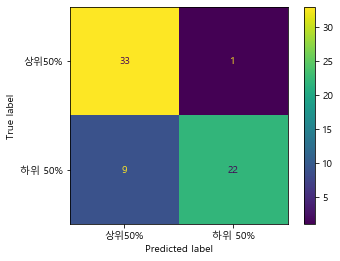

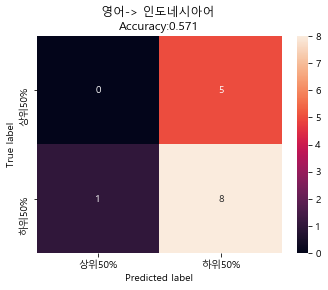

Accuracy : 0.571 
Precision : 0.615 
Recall : 0.889 
F1_score: 0.727 


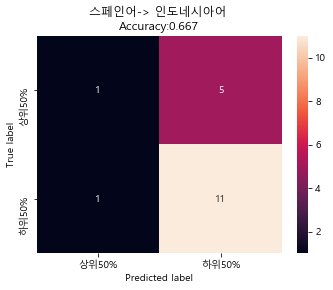

Accuracy : 0.667 
Precision : 0.688 
Recall : 0.917 
F1_score: 0.786 


In [16]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      display_labels=['상위50%', '하위 50%'])
confusion_matrix_lan(X0_test, y0_test, '영어', '인도네시아어')
confusion_matrix_lan(X1_test, y1_test, '스페인어', '인도네시아어')

# Models Evaluation 
## 인도네시아어 자체

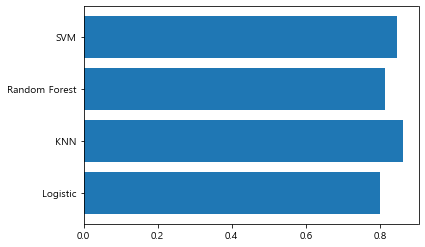

,Accuracy
Logistic,0.800000
KNN,0.861538
Random Forest,0.815385
SVM,0.846154


In [17]:
model_score = [logist, knn, RF, SVM]
models = ['Logistic', 'KNN', 'Random Forest', 'SVM']

plt.barh(models, model_score,)
plt.show()
pd.DataFrame(model_score, index=models, columns=['Accuracy'])

## 영어 -> 인도네시아어

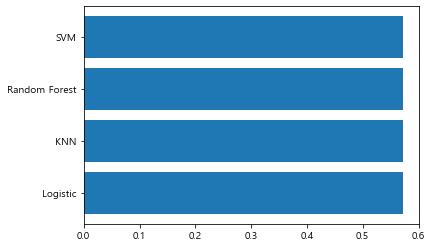

,Accuracy
Logistic,0.571429
KNN,0.571429
Random Forest,0.571429
SVM,0.571429


In [18]:
model_score=[logist_pred0,knn_pred0, RF_pred0, SVM_pred0]
models= ['Logistic','KNN','Random Forest','SVM']
plt.barh(models,model_score)
plt.show()
pd.DataFrame(model_score,index= models ,columns=['Accuracy'])

##  스페인어 -> 인도네시아어


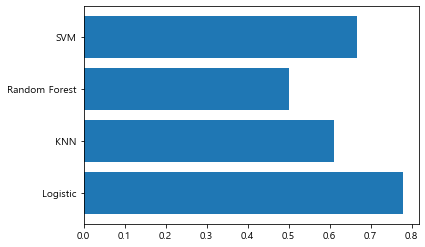

,Accuracy
Logistic,0.777778
KNN,0.611111
Random Forest,0.500000
SVM,0.666667


In [19]:
model_score = [logist_pred1, knn_pred1, RF_pred1, SVM_pred1]
models = ['Logistic', 'KNN', 'Random Forest', 'SVM']
plt.barh(models, model_score)
plt.show()
pd.DataFrame(model_score, index=models, columns=['Accuracy'])